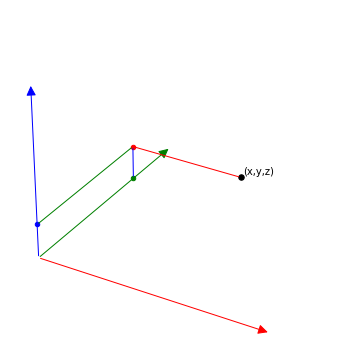

In [208]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from collections import namedtuple


from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)


def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)


from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        return True

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D, 'arrow3D', _arrow3D)

fig = plt.figure( figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.arrow3D(0,0,0,
           1,0,0,
           mutation_scale=20,
           arrowstyle="-|>",color="red",
           linestyle='solid')
ax.arrow3D(0,0,0,
           0,1,0,
           mutation_scale=20,
           arrowstyle="-|>",color="green",
           linestyle='solid')    

ax.arrow3D(0,0,0,
           0,0,1,
           mutation_scale=20,
           arrowstyle="-|>",color="blue",
           linestyle='solid')                   

x = 0.5
y = 0.7
z = 0.2
ax.scatter([x], [y], [z], s=30, marker='o', color='black')
ax.scatter([0], [y], [z], s=20, marker='o', color='red')
ax.scatter([0], [y], [0], s=20, marker='o', color='green')
ax.scatter([0], [0], [z], s=20, marker='o', color='blue')
ax.annotate3D('(x,y,z)', (x, y, z), xytext=(3, 3), textcoords='offset points')


ax.arrow3D(x,y,z,
           -x,0,0,
           mutation_scale=20,
           arrowstyle="-",color="red",
           linestyle='solid')   

ax.arrow3D(0,y,z,
           0,-y,0,
           mutation_scale=20,
           arrowstyle="-",color="green",
           linestyle='solid')        

ax.arrow3D(0,y,0,
           0,0,z,
           mutation_scale=20,
           arrowstyle="-",color="blue",
           linestyle='solid')                    

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.grid(False)
ax.axis(False)
ax.set_xlim3d(0,0.8)
ax.set_ylim3d(0,0.8)
ax.set_zlim3d(0,0.8)    
fig.tight_layout()
fig.savefig("MyPrt_files/plt1")

<Figure size 1152x288 with 0 Axes>

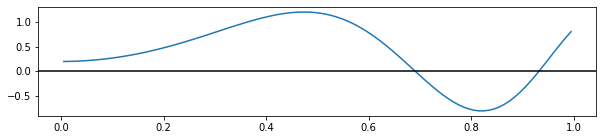

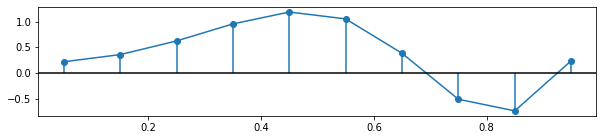

In [209]:
import numpy as np
from functools import partial
def SampleFunc(func, samplePoints):
    y = []
    for i in samplePoints:
       y.append(func(i))
    return y


def FuncProduct(func1, func2, start,end,N):
    v1 = []
    v2 = []
    product = []
    sum = 0

    samplePoints = []

    for i in range(N):
        samplePoints.append(start+((i+0.5)/N)*(end-start))
    
    v1 = SampleFunc(func1, samplePoints)
    v2 = SampleFunc(func2, samplePoints)
    product = np.array(v1)*np.array(v2)
    

    return product


fig = plt.figure(figsize=[16, 4])
def func1(x):
    return math.sin(x*x*7)+0.2

def func2(x):
    return 1



samples=[]
N = 10
for i in range(N):
        samples.append((i+0.5)/N)

samples2=[]
M = 10
N = 100
for i in range(N):
        samples2.append((i+0.5)/N)        
y = SampleFunc(func1, samples)  # should be zero
y2 = SampleFunc(func1, samples2)  # should be zero

fig,axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10,2))
plt.plot(samples2,y2)
plt.axhline(0, color='black')
fig.savefig("MyPrt_files/func1")

fig,axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10,2))
plt.plot(samples,y)
plt.vlines(samples,0,y)
plt.scatter(samples, y)
plt.axhline(0, color='black')

fig.savefig("MyPrt_files/samplefunc")





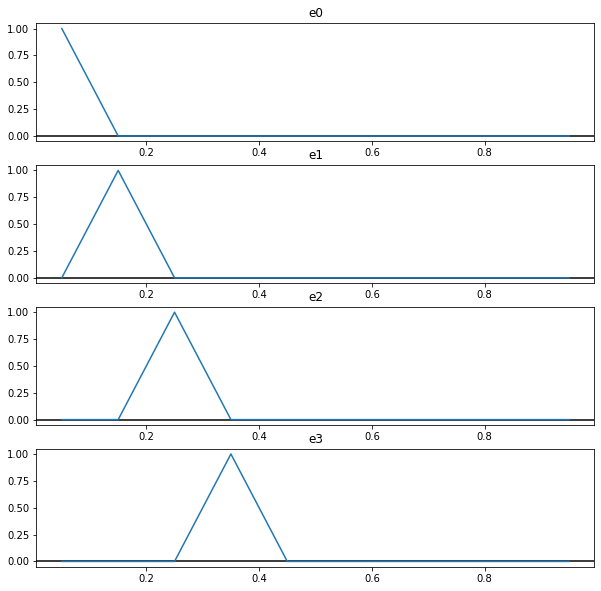

In [210]:
def funcBasis(a,x):
    if abs(x- a)<0.02:
        return 1
    return 0
fig,axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches((10,10))
i = 0
for ax in axes:
    ax.axhline(0, color='black')
    e = partial(funcBasis,(i+0.5)/M)
    ax.plot(samples,SampleFunc(e,samples))
    ax.set_title("e{0}".format(i))
    i+=1

fig.savefig("MyPrt_files/basis")

[0.21749910678451082, 0.35684964310757417, 0.623676257203938, 0.9562091026671466, 1.1882731100330028, 1.0542428351937505, 0.3830545942524278, -0.5144987118625366, -0.7410379003420386, 0.23430795896903286]


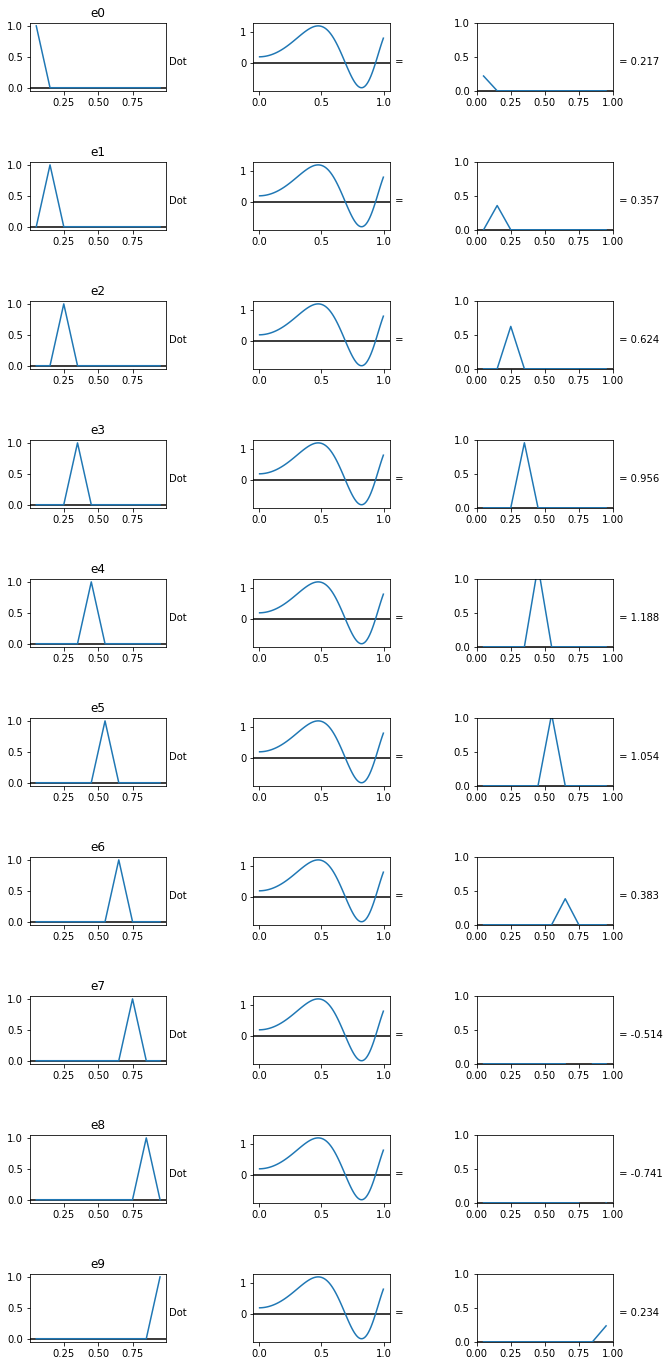

In [211]:
fig,axes = plt.subplots(nrows=10, ncols=3)
fig.set_size_inches((10,20))
i = 0
fig.tight_layout(pad=5.0)
coeffs=[]
for row in axes:
    ax = row[0]
    ax.axhline(0, color='black')
    e = partial(funcBasis,(i+0.5)/M)
    ax.plot(samples,SampleFunc(e,samples))
    ax.set_title("e{0}".format(i))
    
    ax.text(1.02, 0.5, 'Dot',
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)
    ax = row[1]
    ax.axhline(0, color='black')
    ax.plot(samples2,y2)
    ax.text(1.02, 0.5, ' = ',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

    ax = row[2]
    ax.axhline(0, color='black')
    e = partial(funcBasis,(i+0.5)/M)
    ax.plot(samples,FuncProduct(func1,e,0,1,M))
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))


    coeffs.append(func1((i+0.5)/M))
    ax.text(1.02, 0.5, ' = {:.3f}'.format(coeffs[-1]),
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)
    i+=1
print (coeffs)
fig.savefig("MyPrt_files/projection")

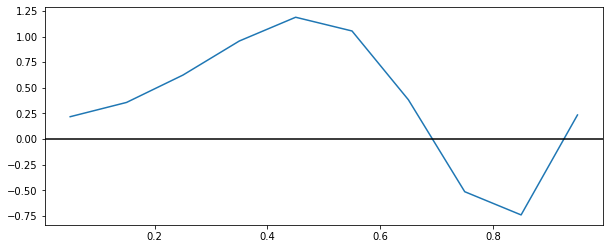

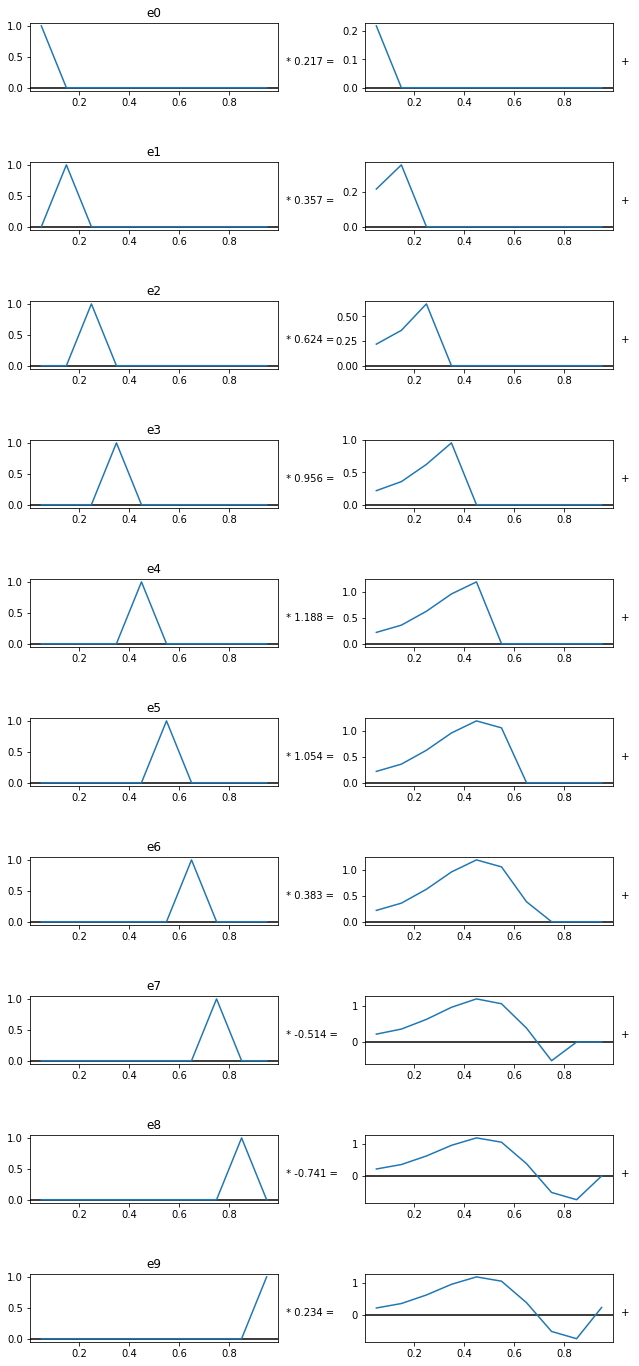

In [212]:
#rebuild
def rebuilt(x):
    ret = 0
    for i in range(10):
        e = partial(funcBasis,(i+0.5)/M)
        ret += e(x)*coeffs[i]
    return ret

y = SampleFunc(rebuilt, samples)


fig,axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10,4))
plt.plot(samples,y)
plt.axhline(0, color='black')
fig.savefig("MyPrt_files/rebuilt")



fig,axes = plt.subplots(nrows=10, ncols=2)
fig.set_size_inches((10,20))
i = 0
fig.tight_layout(pad=5.0)

def partialSampleRetuilt( sampledRebuilt , n):
    ret = []
    for i in range(10):
        if ( i <= n):
            ret.append(sampledRebuilt[i])
        else:
            ret.append(0)
    return ret
    


for row in axes:
    ax = row[0]
    ax.axhline(0, color='black')
    e = partial(funcBasis,(i+0.5)/M)
    ax.plot(samples,SampleFunc(e,samples))
    ax.set_title("e{0}".format(i))
    
    ax.text(1.02, 0.5, ' * {:.3f} = '.format(coeffs[i]),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)
    ax = row[1]
    ax.axhline(0, color='black')
    ax.plot(samples,partialSampleRetuilt(y,i))
    ax.text(1.02, 0.5, ' + ',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

    i+=1
fig.savefig("MyPrt_files/rebuilt2")